In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

# Bengali.AI Handwritten Grapheme - EDA

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from pathlib import Path
from PIL import Image
from tqdm import tqdm

## Data

In [18]:
DATA_PATH = Path('../input')
IMG_HEIGHT = 137
IMG_WIDTH = 236

In [11]:
!ls {DATA_PATH}

class_map.csv		   test_image_data_3.parquet
image_pickles		   train.csv
sample_submission.csv	   train_folds.csv
test.csv		   train_image_data_0.parquet
test_image_data_0.parquet  train_image_data_1.parquet
test_image_data_1.parquet  train_image_data_2.parquet
test_image_data_2.parquet  train_image_data_3.parquet


### CSV

In [12]:
df_train = pd.read_csv(DATA_PATH / 'train.csv'); df_train.head()

,image_id,grapheme_root,vowel_diacritic,consonant_diacritic,grapheme
0,Train_0,15,9,5,ক্ট্রো
1,Train_1,159,0,0,হ
2,Train_2,22,3,5,খ্রী
3,Train_3,53,2,2,র্টি
4,Train_4,71,9,5,থ্রো


In [13]:
df_train.shape

(200840, 5)

In [14]:
df_test = pd.read_csv(DATA_PATH / 'test.csv'); df_test.head()

,row_id,image_id,component
0,Test_0_consonant_diacritic,Test_0,consonant_diacritic
1,Test_0_grapheme_root,Test_0,grapheme_root
2,Test_0_vowel_diacritic,Test_0,vowel_diacritic
3,Test_1_consonant_diacritic,Test_1,consonant_diacritic
4,Test_1_grapheme_root,Test_1,grapheme_root


In [15]:
df_test.shape

(36, 3)

In [16]:
df_class_map = pd.read_csv(DATA_PATH / 'class_map.csv'); df_class_map.head()

,component_type,label,component
0,grapheme_root,0,ং
1,grapheme_root,1,ঃ
2,grapheme_root,2,অ
3,grapheme_root,3,আ
4,grapheme_root,4,ই


In [17]:
df_class_map.shape

(186, 3)

### Images

In [5]:
%time df_train_0 = pd.read_parquet(DATA_PATH / 'train_image_data_0.parquet')

CPU times: user 14 s, sys: 4.3 s, total: 18.3 s
Wall time: 26.5 s


In [6]:
df_train_0.shape

(50210, 32333)

In [7]:
df_train_0.head()

,image_id,0,1,2,3,4,5,6,7,8,...,32322,32323,32324,32325,32326,32327,32328,32329,32330,32331
0,Train_0,254,253,252,253,251,252,253,251,251,...,253,253,253,253,253,253,253,253,253,251
1,Train_1,251,244,238,245,248,246,246,247,251,...,255,255,255,255,255,255,255,255,255,254
2,Train_2,251,250,249,250,249,245,247,252,252,...,254,253,252,252,253,253,253,253,251,249
3,Train_3,247,247,249,253,253,252,251,251,250,...,254,254,254,254,254,253,253,252,251,252
4,Train_4,249,248,246,246,248,244,242,242,229,...,255,255,255,255,255,255,255,255,255,255


In [8]:
%time df_train_1 = pd.read_parquet(DATA_PATH / 'train_image_data_1.parquet')

CPU times: user 13.5 s, sys: 4.19 s, total: 17.7 s
Wall time: 33.2 s


In [9]:
df_train_1.shape

(50210, 32333)

In [10]:
df_train_1.head()

,image_id,0,1,2,3,4,5,6,7,8,...,32322,32323,32324,32325,32326,32327,32328,32329,32330,32331
0,Train_50210,246,253,251,250,249,252,246,250,250,...,255,255,255,255,255,255,255,255,254,253
1,Train_50211,250,245,241,244,249,253,253,254,254,...,254,254,253,253,253,254,255,253,253,254
2,Train_50212,248,248,249,249,250,251,250,250,249,...,255,255,255,255,255,255,255,255,255,255
3,Train_50213,253,252,250,252,252,251,252,252,252,...,252,252,253,252,252,251,250,251,251,253
4,Train_50214,250,252,252,250,250,252,253,254,254,...,251,252,251,250,251,252,252,252,252,252


## Unique values

In [55]:
print('Train')
print('number of unique grapheme roots:', df_train['grapheme_root'].nunique())
print('number of unique vowel diacritics:', df_train['vowel_diacritic'].nunique())
print('number of consonant diacritics:',df_train['consonant_diacritic'].nunique())
print('total combinations:', len(df_train.groupby(['grapheme_root',
                                                   'vowel_diacritic',
                                                   'consonant_diacritic']).count()))

Train
number of unique grapheme roots: 168
number of unique vowel diacritics: 11
number of consonant diacritics: 7
total combinations: 1292


In [51]:
print('Class map')
print(df_class_map['component_type'].value_counts())

Class map
grapheme_root          168
vowel_diacritic         11
consonant_diacritic      7
Name: component_type, dtype: int64


## Data distribution

Grapheme roots

In [57]:
df_class_map[df_class_map['component_type'] == 'grapheme_root']['component'].values

array(['ং', 'ঃ', 'অ', 'আ', 'ই', 'ঈ', 'উ', 'ঊ', 'ঋ', 'এ', 'ঐ', 'ও', 'ঔ',
       'ক', 'ক্ক', 'ক্ট', 'ক্ত', 'ক্ল', 'ক্ষ', 'ক্ষ্ণ', 'ক্ষ্ম', 'ক্স',
       'খ', 'গ', 'গ্ধ', 'গ্ন', 'গ্ব', 'গ্ম', 'গ্ল', 'ঘ', 'ঘ্ন', 'ঙ',
       'ঙ্ক', 'ঙ্ক্ত', 'ঙ্ক্ষ', 'ঙ্খ', 'ঙ্গ', 'ঙ্ঘ', 'চ', 'চ্চ', 'চ্ছ',
       'চ্ছ্ব', 'ছ', 'জ', 'জ্জ', 'জ্জ্ব', 'জ্ঞ', 'জ্ব', 'ঝ', 'ঞ', 'ঞ্চ',
       'ঞ্ছ', 'ঞ্জ', 'ট', 'ট্ট', 'ঠ', 'ড', 'ড্ড', 'ঢ', 'ণ', 'ণ্ট', 'ণ্ঠ',
       'ণ্ড', 'ণ্ণ', 'ত', 'ত্ত', 'ত্ত্ব', 'ত্থ', 'ত্ন', 'ত্ব', 'ত্ম', 'থ',
       'দ', 'দ্ঘ', 'দ্দ', 'দ্ধ', 'দ্ব', 'দ্ভ', 'দ্ম', 'ধ', 'ধ্ব', 'ন',
       'ন্জ', 'ন্ট', 'ন্ঠ', 'ন্ড', 'ন্ত', 'ন্ত্ব', 'ন্থ', 'ন্দ', 'ন্দ্ব',
       'ন্ধ', 'ন্ন', 'ন্ব', 'ন্ম', 'ন্স', 'প', 'প্ট', 'প্ত', 'প্ন', 'প্প',
       'প্ল', 'প্স', 'ফ', 'ফ্ট', 'ফ্ফ', 'ফ্ল', 'ব', 'ব্জ', 'ব্দ', 'ব্ধ',
       'ব্ব', 'ব্ল', 'ভ', 'ভ্ল', 'ম', 'ম্ন', 'ম্প', 'ম্ব', 'ম্ভ', 'ম্ম',
       'ম্ল', 'য', 'র', 'ল', 'ল্ক', 'ল্গ', 'ল্ট', 'ল্ড', 'ল্প', 'ল্ব',
       'ল্ম', 'ল্ল', 'শ', 'শ্চ', 'শ্ন', 'শ্ব', 'শ্ম', 'শ

Vowel diacritic

In [58]:
df_class_map[df_class_map['component_type'] == 'vowel_diacritic']['component'].values

array(['0', 'া', 'ি', 'ী', 'ু', 'ূ', 'ৃ', 'ে', 'ৈ', 'ো', 'ৌ'],
      dtype=object)

Consonant diacritic

In [59]:
df_class_map[df_class_map['component_type'] == 'consonant_diacritic']['component'].values

array(['0', 'ঁ', 'র্', 'র্য', '্য', '্র', '্র্য'], dtype=object)

In [81]:
def plot_counts(feat, df, sz):
    fig, ax = plt.subplots(1, 1, figsize=(4 * sz, 4))
    sns.countplot(x=feat, data=df, order=df[feat].value_counts().index[:20], ax=ax)
    ax.set_title(feat)

    total = len(df)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() // 2, height + 50, f'{height / total * 100:1.2f}%')

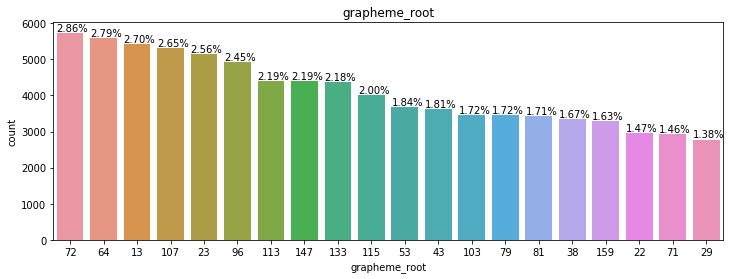

In [90]:
plot_counts('grapheme_root', df_train, 3)

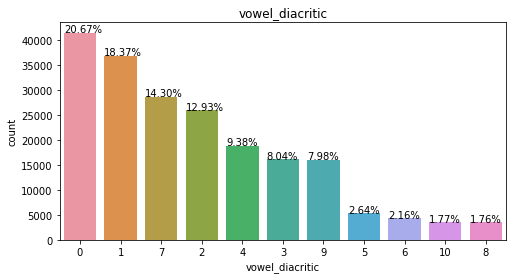

In [86]:
plot_counts('vowel_diacritic', df_train, 2)

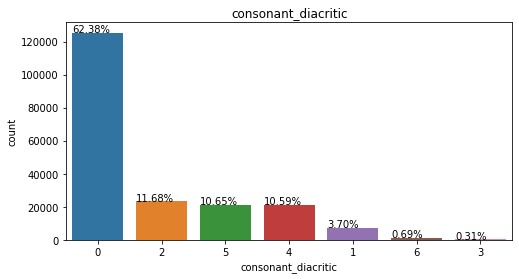

In [92]:
plot_counts('consonant_diacritic', df_train, 2)

In [93]:
df_train.head()

,image_id,grapheme_root,vowel_diacritic,consonant_diacritic,grapheme
0,Train_0,15,9,5,ক্ট্রো
1,Train_1,159,0,0,হ
2,Train_2,22,3,5,খ্রী
3,Train_3,53,2,2,র্টি
4,Train_4,71,9,5,থ্রো


In [111]:
def plot_count_heatmap(feat1, feat2, df, sz=1):
    tmp = df.groupby([feat1, feat2])['grapheme'].count().reset_index()
    heatmap_data = tmp.pivot(feat1, feat2, 'grapheme')
    
    fig, ax = plt.subplots(figsize=(9, 4 * sz))
    sns.heatmap(heatmap_data, annot=True, fmt='3.0f', linewidths=0.5)

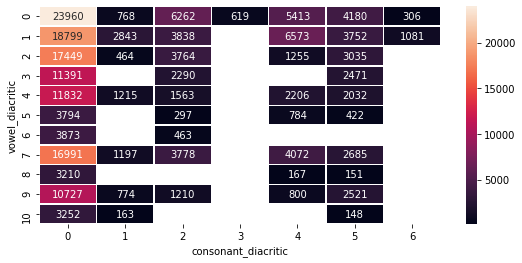

In [112]:
plot_count_heatmap('vowel_diacritic', 'consonant_diacritic', df_train)

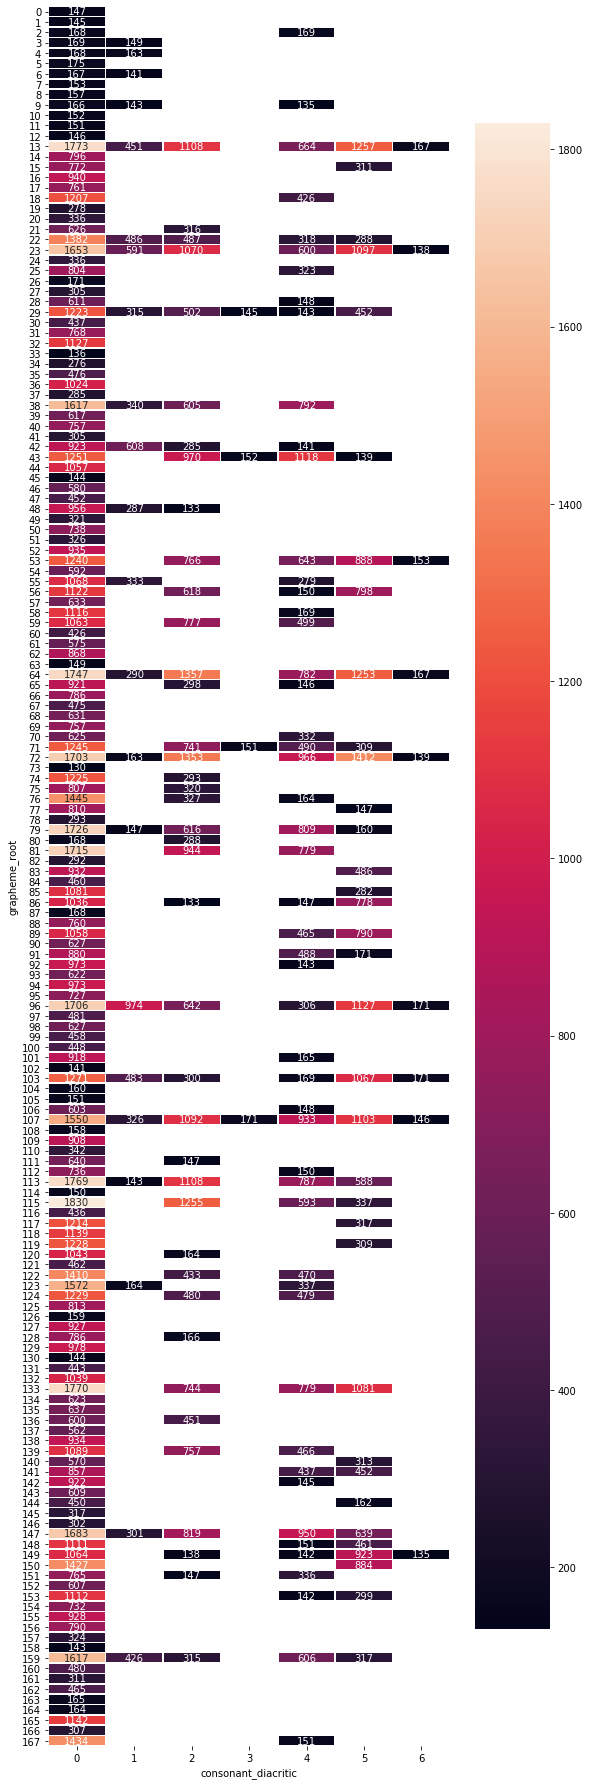

In [114]:
plot_count_heatmap('grapheme_root', 'consonant_diacritic', df_train, sz=8)

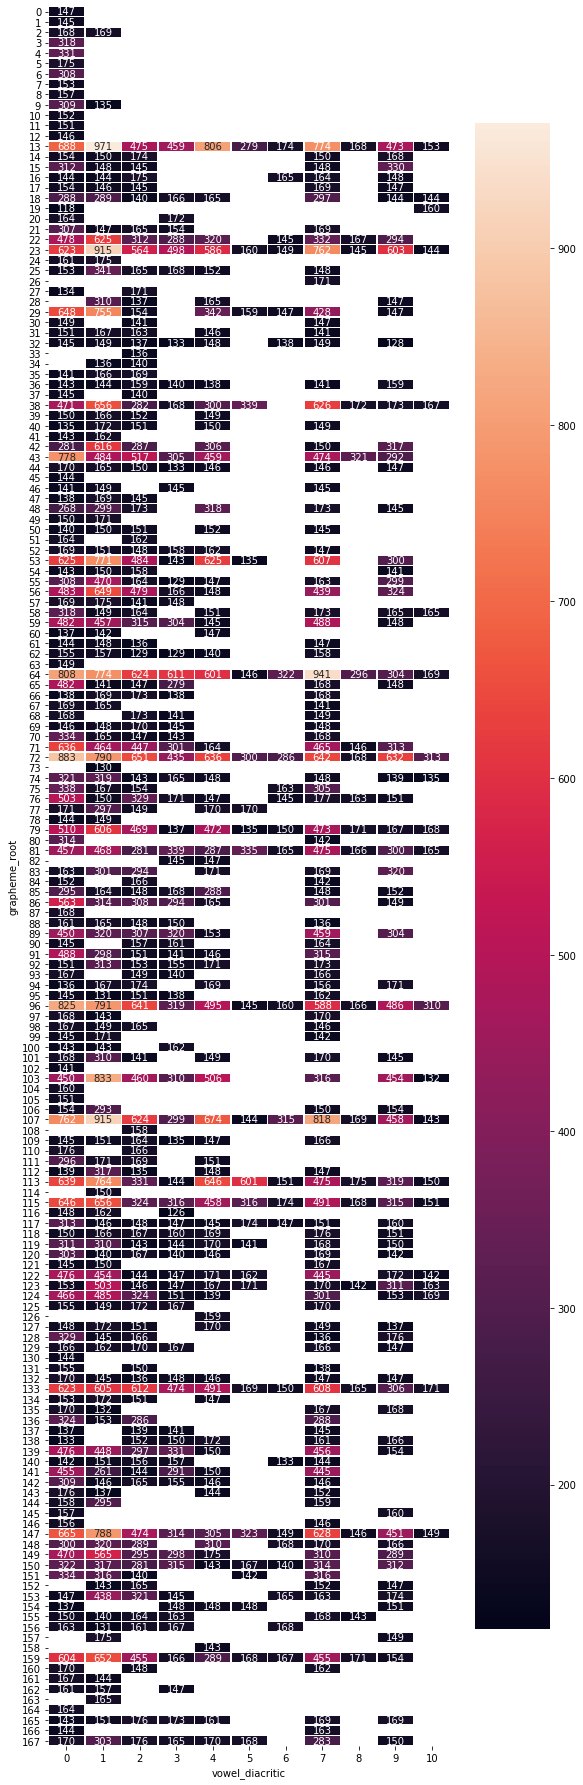

In [115]:
plot_count_heatmap('grapheme_root', 'vowel_diacritic', df_train, sz=8)

## Plot graphemes

In [118]:
def plot_sample_images(df, sz=5):
    samples = df.sample(sz * sz)
    image_ids = df['image_id'].values
    image_arr = df.drop('image_id', axis=1).values.astype(np.uint8)
    
    fig, axes = plt.subplots(sz, sz, figsize=(12, 12))
    axes = axes.flatten()
    
    for ax, image_id, image in zip(axes, image_ids, image_arr):
        image = image.reshape(IMG_HEIGHT, IMG_WIDTH)
        ax.imshow(image, cmap='gray')
        ax.set_title(image_id)

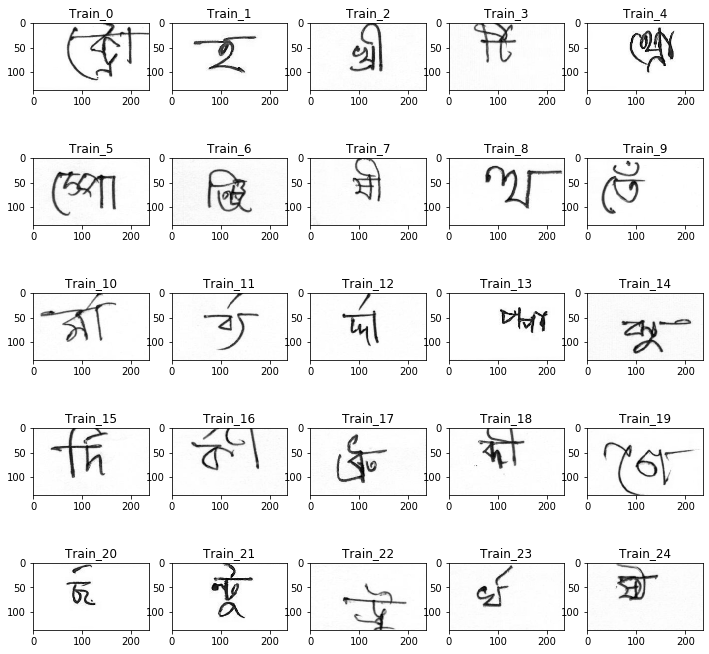

In [121]:
plot_sample_images(df_train_0, sz=5)

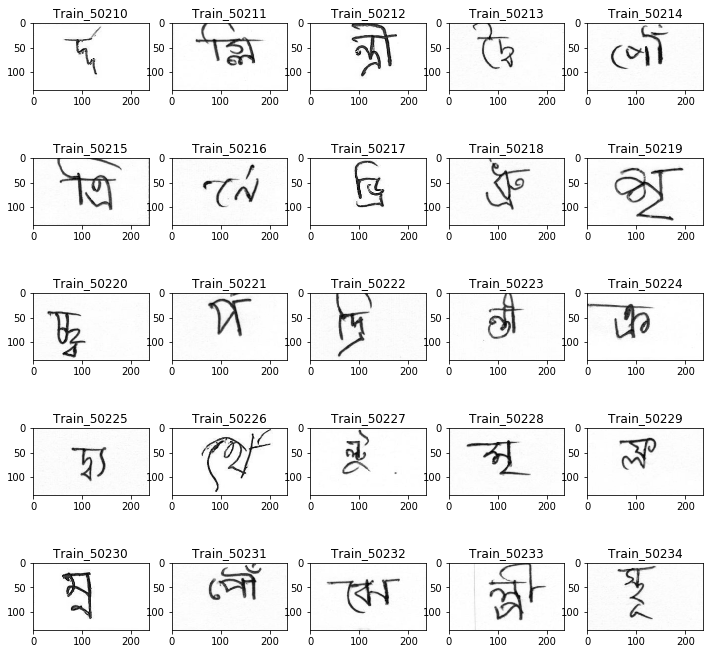

In [122]:
plot_sample_images(df_train_1, sz=5)

Plot graphemes with given grapheme root, vowel diacritic, and consonant diacritic.

In [151]:
def plot_various_sample_images( df_data, g, v, c, sz=5):
    df_train_sample = df_train[(df_train['grapheme_root'] == g) &
                               (df_train['vowel_diacritic'] == v) &
                               (df_train['consonant_diacritic'] == c)]
    
    df_data_sample = df_data.merge(df_train_sample['image_id'], how='inner')
    
    print('number of samples in all data:', len(df_train_sample))
    print('number of samples in our data:', len(df_data_sample))
    
    grapheme = df_train_sample['grapheme'].sample(1).values[0]
    
    grapheme_root = df_class_map.loc[
            df_class_map['component_type'] == 'grapheme_root', 'component'].sample(1).values[0]
    
    vowel_diacritic = df_class_map.loc[
            df_class_map['component_type'] == 'vowel_diacritic', 'component'].sample(1).values[0]
    
    consonant_diacritic = df_class_map.loc[
            df_class_map['component_type'] == 'consonant_diacritic', 'component'].sample(1).values[0]
    
    print(f'grapheme: {grapheme}, grapheme root: {grapheme_root}, vowel diacritic: {vowel_diacritic}, '
          f'consonant diacritic: {consonant_diacritic}')

    plot_sample_images(df_data_sample, sz=5)

number of samples in all data: 163
number of samples in our data: 36
grapheme: দাঁ, grapheme root: দ্ভ, vowel diacritic: ৃ, consonant diacritic: 0


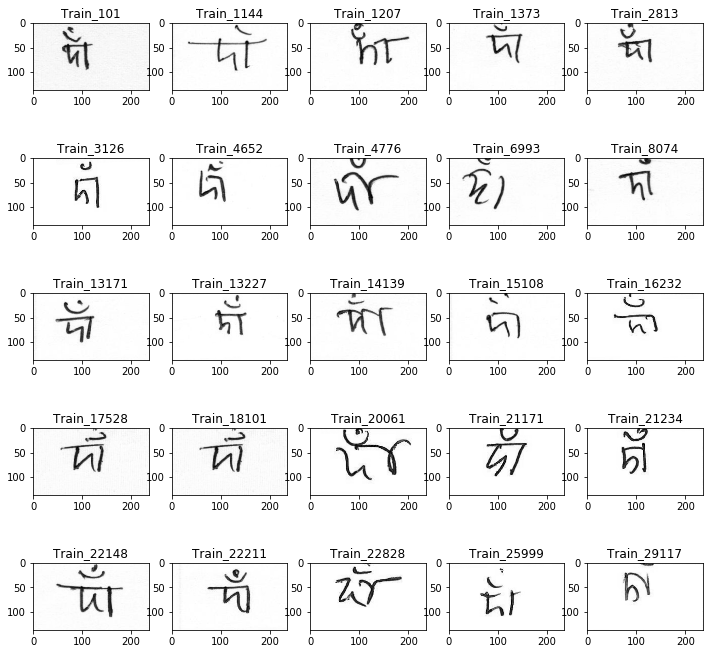

In [152]:
plot_various_sample_images(df_train_0, 72, 1, 1, 4)

number of samples in all data: 163
number of samples in our data: 36
grapheme: দাঁ, grapheme root: ল্প, vowel diacritic: ো, consonant diacritic: র্য


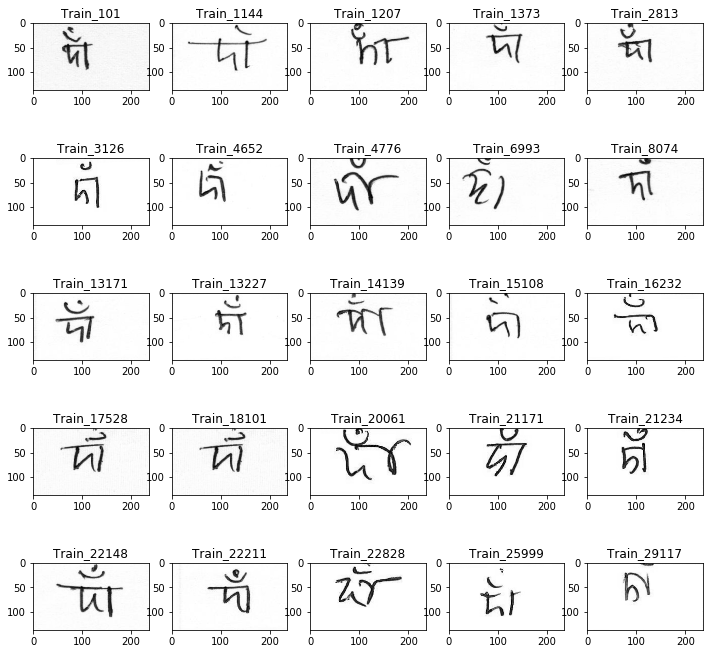

In [154]:
plot_various_sample_images(df_train_0, 72, 1, 1, 4)

number of samples in all data: 175
number of samples in our data: 38
grapheme: ক, grapheme root: স্ব, vowel diacritic: ূ, consonant diacritic: ্য


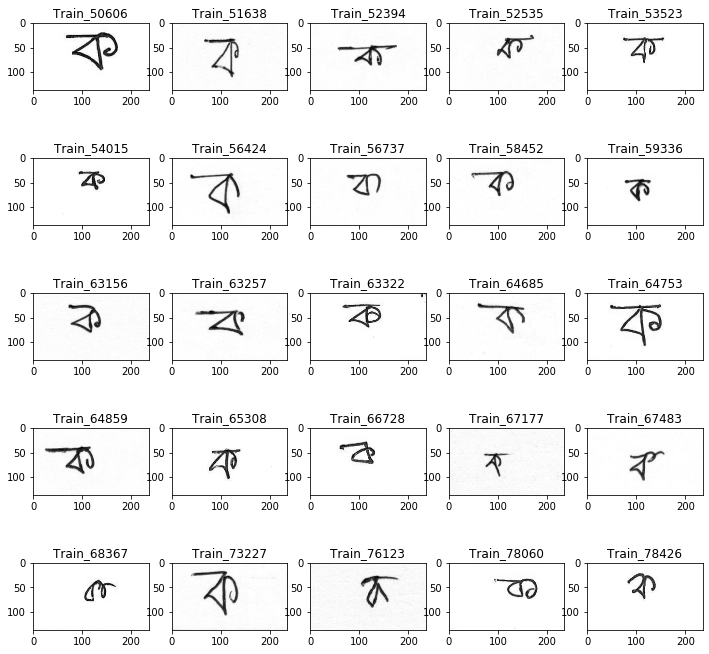

In [155]:
plot_various_sample_images(df_train_1,13, 0, 0, 4)

number of samples in all data: 167
number of samples in our data: 46
grapheme: র্গী, grapheme root: ন্ন, vowel diacritic: ূ, consonant diacritic: ্র্য


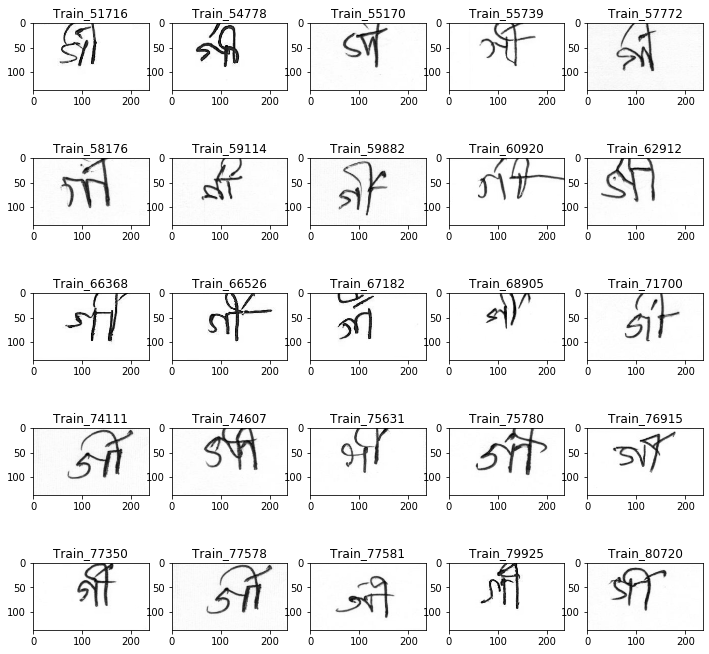

In [156]:
plot_various_sample_images(df_train_1, 23, 3, 2, 4)